In [1]:
import sys
import os
import json
import torch
import yaml
import numpy as np
import cv2
import copy
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
DATA_PATH = "/workspace/plane-nerf/data/jackal_floor_training_data_1"
TRANSFORM_PATH = "transforms.json"
with open(os.path.join(DATA_PATH, TRANSFORM_PATH), 'r') as f:
    transforms = json.load(f)
IMG_INDEX = 0

In [3]:
for k in transforms.keys():
    print(k,transforms[k])

focal_length 4.74
pixel_width 0.0042
pixel_height 0.0042
w 1280
h 720
fov_x 1.031736666064982
fl_x 1128.5714285714287
fl_y 1128.5714285714287
cx 640
cy 360
camera_model OPENCV
frames [{'file_path': 'images/0.png', 'transform_matrix': [[0.9999999999999999, 0.0, 0.0, 0.0], [0.0, 0.7073882691671997, -0.706825181105366, -3.0], [0.0, 0.706825181105366, 0.7073882691671997, 2.5], [0.0, 0.0, 0.0, 1.0]], 'mask_path': 'masks/0.png'}, {'file_path': 'images/1.png', 'transform_matrix': [[0.9921147013144777, -0.08865925916018154, 0.08858868551261047, 0.37599970069291266], [0.1253332335643042, 0.7018103013781817, -0.7012516534339018, -2.9763441039434335], [0.0, 0.706825181105366, 0.7073882691671997, 2.5], [0.0, 0.0, 0.0, 1.0]], 'mask_path': 'masks/1.png'}, {'file_path': 'images/2.png', 'transform_matrix': [[0.9685831611286311, -0.17592030884093282, 0.17578027453437153, 0.7460696614945644], [0.2486898871648548, 0.6851643658952773, -0.6846189682803526, -2.9057494833858937], [0.0, 0.706825181105366, 0.7

[[1.12857143e+03 0.00000000e+00 6.40000000e+02]
 [0.00000000e+00 1.12857143e+03 3.60000000e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[ 1.          0.          0.          0.        ]
 [ 0.         -0.70738827 -0.70682518 -0.35510185]
 [ 0.          0.70682518 -0.70738827  3.88894622]
 [ 0.          0.          0.          1.        ]]
[[640.        ]
 [256.94951146]
 [  1.        ]]


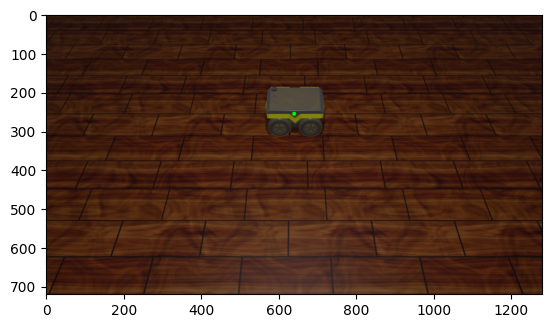

In [6]:
#Get instrinsic
intrinsic = np.zeros((3, 3))
intrinsic[0,0] = transforms["fl_x"]
intrinsic[1,1] = transforms["fl_y"]
intrinsic[0,2] = transforms["cx"]
intrinsic[1,2] = transforms["cy"]
intrinsic[2, 2] = 1

print(intrinsic)

#Get extrinsic
extrinsic = transforms["frames"][IMG_INDEX]["transform_matrix"]
extrinsic = np.array(extrinsic).reshape(4, 4)
extrinsic = np.linalg.inv(extrinsic)
rotate = np.zeros((4,4))
rotate[0, 0] = 1
rotate[1, 1] = -1
rotate[2, 2] = -1
rotate[3, 3] = 1
extrinsic = rotate @ extrinsic

print(extrinsic)

#Calcualte Origin Pixel
origin = np.zeros((4, 1))
origin[3, 0] = 1
origin = extrinsic @ origin
origin = origin[:3]
origin = intrinsic @ origin
origin = origin / origin[2]

print(origin)

#Get image
img_path = os.path.join(DATA_PATH, transforms["frames"][IMG_INDEX]["file_path"])
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

#Draw green cross at origin
origin = origin[:2].reshape(2)
origin = origin.astype(int)
img = cv2.circle(img, (origin[0], origin[1]), 5, (0, 255, 0), -1)
plt.imshow(img)

In [7]:
#Save Image
img = Image.fromarray(img)
img.save("origin.png")